# Text and Transformers lab
In this lecture: a bit of text processing, loading text in keras, classification with 1DConvnet & transformers

Let's start by reviewing a bit of text processing

Unlike Images, Text has quite a few criticalities. Just to name a few:

- High Dimensionality: Text data, especially when tokenized into individual words or n-grams, can lead to a very high-dimensional feature space. This can make models computationally expensive and increase the risk of overfitting.

- Sparsity: Most text documents will only contain a tiny fraction of the words in a language, resulting in many zeros in the feature representation. This sparsity can make certain modeling techniques inefficient or infeasible.

- Ambiguity and Polysemy: Many words in languages have multiple meanings based on context. For example, the word "bank" can mean the side of a river or a financial institution.

- Synonymy: Different words can have similar meanings, like "big" and "large". This poses a challenge in identifying the true intent or sentiment behind texts.

- Complex Dependencies: The meaning of a word can depend on its surrounding words, or even words much earlier in a text. Capturing long-term dependencies can be challenging.

- Noisy Data: Text data, especially from sources like social media, can be noisy. They may contain typos, slang, non-standard grammar, or emoticons.

- Handling of Out-of-Vocabulary (OOV) Words: In real-world applications, it's common to encounter words not seen during training. Handling OOV words is challenging.

- Cultural and Temporal Dynamics: The way language is used can change based on cultural or temporal contexts, making it hard to generalize models across different cultures or time periods.

- Multilingual Challenges: Building models that work across multiple languages or even dialects can be challenging, especially when resources for certain languages are scarce.

### some examples of regex

In [3]:
import re
text = "Hello, World!"
match = re.search("World", text)
if match:
    print("Found:", match.group())

Found: World


In [4]:
text = "I am Free."
match = re.search("[FT]ree", text)
if match:
    print("Found:", match.group())

Found: Free


In [5]:
text = "Order number: 12345"
match = re.search("\d+", text)  # + indicates one or more
if match:
    print("Found:", match.group())

Found: 12345


In [6]:
text = "Hello"
if re.match("^Hello", text):  # ^ matches the start
    print("Starts with 'Hello'")
if re.search("Hello$", text):  # $ matches the end
    print("Ends with 'Hello'")

Starts with 'Hello'
Ends with 'Hello'


In [7]:
text = "apple,banana,orange"
fruits = re.split(",", text)
print(fruits)  # ['apple', 'banana', 'orange']

['apple', 'banana', 'orange']


In [8]:
text = "HELLO"
match = re.search("hello", text, re.IGNORECASE)
if match:
    print("Found:", match.group())

Found: HELLO


In [9]:
text = "this is my email fabio.merizzi@unibo.it"
match = re.search("[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}", text)
if match:
    print("Found email:", match.group())

Found email: fabio.merizzi@unibo.it


### Some basic ideas about text preprocessing
Reducing the high dimensionality of text

A simple idea is to lowercase every word, casing has little meaning

In [10]:
text = "Hello here is some text, BYE"
# Lowercasing
lowercased_text = text.lower()
print("Lowercased Text:", lowercased_text)
# Tokenization
tokens = lowercased_text.split()
print("Tokens:", tokens)

Lowercased Text: hello here is some text, bye
Tokens: ['hello', 'here', 'is', 'some', 'text,', 'bye']


Punctuations as well

In [11]:
#remove punctuations
import string
text = "Hello, World! who's speaking? Ah, it's you!"
clean_text = text.translate(str.maketrans('', '', string.punctuation))
print("Cleaned Text:", clean_text)

Cleaned Text: Hello World whos speaking Ah its you


In [14]:
#some words have less meaning
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
text = "This is an example of removing stopwords from a sentence."
tokens = text.split()
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['example', 'removing', 'stopwords', 'sentence.']


[nltk_data] Downloading package stopwords to /home/faster/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Some words have very similiar meaning but different coniugations, these may impair the classification, for addressing this problem we can employ Stemming and Lemming. 

Stemming truncates words by chopping off the ends of words using heuristic processes.

In [15]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
text = "running runner runs run"
tokens = text.split()
stemmed_tokens = [ps.stem(token) for token in tokens]
print("Stemmed Tokens:", stemmed_tokens)

Stemmed Tokens: ['run', 'runner', 'run', 'run']


Lemming reduces words to their base or root form by considering the dictionary form of the word

In [16]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
text = "geese mice swimming swam"
tokens = text.split()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmatized Tokens:", lemmatized_tokens)

[nltk_data] Downloading package wordnet to /home/faster/nltk_data...


Lemmatized Tokens: ['goose', 'mouse', 'swimming', 'swam']


### Encoding Text
transforming text into numbers

#### One hot encoding
Practical, but only with very low cardinality

In [17]:
from sklearn.preprocessing import OneHotEncoder

words = [["hello"], ["this"], ["is"], ["the"], ["machine"], ["learning"], ["course"]]

encoder = OneHotEncoder(sparse_output=False)
encoded_words = encoder.fit_transform(words)

print("One-Hot Encoded Words:\n", encoded_words)

One-Hot Encoded Words:
 [[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


#### Label Encoding, great for transforming labels

In [18]:
from sklearn.preprocessing import LabelEncoder

labels = ["cat", "dog", "bird", "cat", "bird"]
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels) 

[1 2 0 1 0]


#### Bag of Words (BoW - TF) Encoding is essentially a histogram of word frequencies in a text document. For each document or text sample, count the number of occurrences of each word and represent the document as this count vector.

 When to use it:

    Document classification: BoW is popular for tasks like email spam classification or sentiment analysis, where the occurrence of certain words can be a strong indicator of the class.
    Texts with different lengths: Since BoW leads to fixed-length vectors (the size of the vocabulary), it's useful when dealing with texts of varying lengths.
    Simple models: For models like Naive Bayes, BoW can be very effective.

Cons:

    Loses all information about word order. "This is good, not bad" and "This is bad, not good" would have the same representation.
    Like one-hot encoding, BoW can also lead to high-dimensional data with large vocabularies.
    Doesn't capture semantic relationships between words.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Hello there this is the machine learning course, hello again",
    "Welcome to the machine learning class."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Representation:\n", X.toarray())

Vocabulary: ['again' 'class' 'course' 'hello' 'is' 'learning' 'machine' 'the' 'there'
 'this' 'to' 'welcome']
BoW Representation:
 [[1 0 1 2 1 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 1 1 0 0 1 1]]


#### TF-IDF
TF-IDF is a statistical measure that evaluates the importance of a word in a document, relative to a collection of documents (often called a corpus). It's composed of two terms:

Term Frequency (TF): Represents how often a term appears in a given document.

$$TF(t,d)= \frac{Number \, of \, times \, term \,t \,appears \,in \,document \,d}{Total\, number \,of \,terms \,in\, document\, d}$$


Inverse Document Frequency (IDF): Represents the significance of the term across all documents in the corpus. It assigns more weight to terms that are rare across documents.

$$IDF(t)= log⁡(\frac{Total\, number\, of\, documents}{Number\, of \,documents \,containing\, term\, t})$$

The TF-IDF value for a term in a document is then:
$$TF-IDF(t,d)=TF(t,d)×IDF(t)$$

Words with high TF-IDF scores are those that are important in a given document relative to the entire corpus.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    "I love machine learning.",
    "Machine learning is challenging.",
    "Python is a popular language for machine learning.",
]

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF values
tfidf_matrix = vectorizer.fit_transform(docs)

# Feature names (words in the vocabulary)
features = vectorizer.get_feature_names_out()


In [21]:
features

array(['challenging', 'for', 'is', 'language', 'learning', 'love',
       'machine', 'popular', 'python'], dtype=object)

In [22]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.45329466,
        0.76749457, 0.45329466, 0.        , 0.        ],
       [0.66283998, 0.        , 0.50410689, 0.        , 0.39148397,
        0.        , 0.39148397, 0.        , 0.        ],
       [0.        , 0.43535684, 0.3311001 , 0.43535684, 0.25712876,
        0.        , 0.25712876, 0.43535684, 0.43535684]])

#### What we really want: dense word embeddings

The encodings methods mentioned above have two main drawbacks we need to solve. 1) The very high dimensionality of the embedding 2) similar words/concept are placed randomly in the encoding space.

We well see in the following implementations how to solve both this issues via a neural embedding

### Loading text from file to keras dataset

IMDB movie reviews, one of the most common dataset for mlp

In [23]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf
import numpy as np
from keras import layers
from keras import ops

2024-05-15 14:22:01.826293: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 14:22:01.947596: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 14:22:01.947651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 14:22:01.964946: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 14:22:02.009775: I tensorflow/core/platform/cpu_feature_guar

In [24]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  7451k      0  0:00:11  0:00:11 --:--:-- 17.2M


In [25]:
!cat aclImdb/train/pos/6248_7.txt

Being an Austrian myself this has been a straight knock in my face. Fortunately I don't live nowhere near the place where this movie takes place but unfortunately it portrays everything that the rest of Austria hates about Viennese people (or people close to that region). And it is very easy to read that this is exactly the directors intention: to let your head sink into your hands and say "Oh my god, how can THAT be possible!". No, not with me, the (in my opinion) totally exaggerated uncensored swinger club scene is not necessary, I watch porn, sure, but in this context I was rather disgusted than put in the right context.<br /><br />This movie tells a story about how misled people who suffer from lack of education or bad company try to survive and live in a world of redundancy and boring horizons. A girl who is treated like a whore by her super-jealous boyfriend (and still keeps coming back), a female teacher who discovers her masochism by putting the life of her super-cruel "lover" 

In [26]:
!rm -r aclImdb/train/unsup

In [27]:
batch_size = 32
raw_train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.5,
    subset="training",
    seed=1337,
)
raw_val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.5,
    subset="validation",
    seed=1337,
)
raw_test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)

print(f"Number of batches in raw_train_ds: {raw_train_ds.cardinality()}")
print(f"Number of batches in raw_val_ds: {raw_val_ds.cardinality()}")
print(f"Number of batches in raw_test_ds: {raw_test_ds.cardinality()}")


Found 25000 files belonging to 2 classes.
Using 12500 files for training.


2024-05-15 14:22:17.822445: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 14:22:17.897745: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 14:22:17.898079: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 25000 files belonging to 2 classes.
Using 12500 files for validation.
Found 25000 files belonging to 2 classes.
Number of batches in raw_train_ds: 391
Number of batches in raw_val_ds: 391
Number of batches in raw_test_ds: 782


In [28]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(5):
        print(text_batch.numpy()[i])
        print(label_batch.numpy()[i])

b'I\'ve seen tons of science fiction from the 70s; some horrendously bad, and others thought provoking and truly frightening. Soylent Green fits into the latter category. Yes, at times it\'s a little campy, and yes, the furniture is good for a giggle or two, but some of the film seems awfully prescient. Here we have a film, 9 years before Blade Runner, that dares to imagine the future as somthing dark, scary, and nihilistic. Both Charlton Heston and Edward G. Robinson fare far better in this than The Ten Commandments, and Robinson\'s assisted-suicide scene is creepily prescient of Kevorkian and his ilk. Some of the attitudes are dated (can you imagine a filmmaker getting away with the "women as furniture" concept in our oh-so-politically-correct-90s?), but it\'s rare to find a film from the Me Decade that actually can make you think. This is one I\'d love to see on the big screen, because even in a widescreen presentation, I don\'t think the overall scope of this film would receive its

### Prepare text data in the keras framework

In [29]:
import string
import re
#Define custom a preprocessing procedure
def custom_preprocessing(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    no_punctuation = tf.strings.regex_replace(stripped_html, f"[{re.escape(string.punctuation)}]", "")
    return no_punctuation

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
#Let's write our text vectorization layer 
# it will preprocess and map our words into a 
vectorize_layer = keras.layers.TextVectorization(
    standardize=custom_preprocessing,
    max_tokens=20000,
    output_mode="int",
    output_sequence_length=500,
)
# Output can be int, multi_hot or tf_idf

# Now that the vectorize_layer has been created, call `adapt` on a text-only
# dataset to create the vocabulary. You don't have to batch, but for very large
# datasets this means you're not keeping spare copies of the dataset in memory.

# Let's make a text-only dataset (no labels):
text_ds = raw_train_ds.map(lambda x, y: x)
# Let's call `adapt`:
vectorize_layer.adapt(text_ds)

In [32]:
a,b = next(iter(raw_train_ds))

In [33]:
a

<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'I rented this horrible movie. The worst think I have ever seen. I believe a 1st grade class could have done a better job. The worse film I have ever seen and I have seen some bad ones. Nothing scary except I paid 1.50 to rent it and that was 1.49 too much. The acting is horrible, the characters are worse and the film is just a piece of trash. The slauther house scenes are so low budget that it makes a B movied look like an Oscar candidate. All I can say is if you wnat to waste a good evening and a little money go rent this horrible flick. I would rather watch killer clowns from outer space while sitting in a bucket of razors than sit through this flop again',
       b"I spent almost two hours watching a movie that I thought, with all the good actors in it, would be worth watching. I couldn't believe it when the movie ended and I had absolutely no idea what had happened.....I was mad because I could have used that time doing somethi

In [34]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label


# Vectorize the data.
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [35]:
a,b = next(iter(train_ds))

In [36]:
a[0]

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([   11,     7,   238,   157,     1, 14136, 13579,    19,    10,
         235,    21,   241,   131,    27,    44,    11,  3191,     6,
         120,   528,     1,     3,     1,  5493,     6,     2,  1350,
           1,   310,    18,    10,   162,    46,     5,   143,   134,
          63,  2217,   652,   158,     9,     7,     4,   320,   395,
         264,   290,    32, 13579,   115,    27,   270,     2,    61,
           5,    33,   708,  2631,   247,    32,   989,   712,     8,
           2,   784,    19,   428,  2043,     1,    47,   155,    11,
          17,   263,     7,    12,     9,    75,  2831,     2,   518,
           5,    78,    12,    11,  2631,     1,    16,    41,     7,
         337,    16,   138,    14,    39,     1,    39,  5590,    19,
         377,  3903,   932,    78,     3,   365,  2576,     8,     2,
         708,     1,     8,    39,  3588,  6893,     9,     7,   157,
          49,   229,    37,  2043,     1,   

In [37]:
train_ds = train_ds.cache().prefetch(buffer_size=10)
val_ds = val_ds.cache().prefetch(buffer_size=10)
test_ds = test_ds.cache().prefetch(buffer_size=10)

In [38]:
# A integer input for vocab indices.
inputs = keras.Input(shape=(None,), dtype="int64")

# Next, we add a layer to map those vocab indices into a space of dimensionality
# 'embedding_dim'.
x = layers.Embedding(20000,128)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ embedding (Embedding)           │ (None, None, 128)         │  2,560,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, None, 128)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d (Conv1D)                 │ (None, None, 128)         │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1 (Conv1D)               │ (None, None, 128)         │    114,816 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d            │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 128)               │     16,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ predictions (Dense)             │ (None, 1)                 │        129 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,806,273 (10.71 MB)

 Trainable params: 2,806,273 (10.71 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
epochs = 15

# Fit the model using the train and test datasets.
model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15


2024-05-15 14:22:29.171309: I external/local_xla/xla/service/service.cc:168] XLA service 0x2f4470c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-15 14:22:29.171324: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-05-15 14:22:29.194034: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-15 14:22:30.280219: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


 66/391 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5018 - loss: 0.6960

I0000 00:00:1715775752.866379    6059 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5498 - loss: 0.6591 - val_accuracy: 0.8544 - val_loss: 0.3418
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8580 - loss: 0.3283 - val_accuracy: 0.8515 - val_loss: 0.3998
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9479 - loss: 0.1470 - val_accuracy: 0.8296 - val_loss: 0.4924
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9772 - loss: 0.0698 - val_accuracy: 0.8630 - val_loss: 0.5386
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9880 - loss: 0.0361 - val_accuracy: 0.8419 - val_loss: 0.7188
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0372 - val_accuracy: 0.8527 - val_loss: 0.7703
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.8603 - val_loss: 0.6919
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9905 - loss: 0.0247 - val_accuracy: 0.8619 - val_

In [41]:
model.evaluate(test_ds)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8354 - loss: 1.1296


[1.1190568208694458, 0.8373161554336548]

# Let's use a Transformer
Transformer are based on the idea of attention

Understanding multi-head attention: The main idea behind multi-head attention is to split the attention mechanism into multiple "heads." By doing this, the model can capture various aspects of the data in parallel.

The Attention layer takes its input in the form of three parameters, known as the Query, Key, and Value.

$$Attention(Q,K,V) = Softmax(\frac{QK^T}{\sqrt(d_k)})*V$$

The interaction between Queries, Keys, and Values happens as follows in the attention mechanism:

- Scoring: Each query vector is scored against all key vectors using a dot product, which measures how much each element (represented by a query) should attend to every other element (represented by keys).

- Scaling: The scores are then scaled down by the square root of the dimension of the key vectors to help stabilize the gradients during learning.
- Softmax: A softmax function is applied to the scaled scores, converting them into probabilities that sum to one. This softmaxed score represents the attention weights.
- Application: These attention weights are then used to create a weighted sum of the value vectors, which forms the output for each position in the input sequence.

Practically, values and keys are usually the same. In the case of self attention, Queries, Keys and Values are all the same. 

So where is the learning actually happening? In the dense layers (Linear) before the computation of attention.

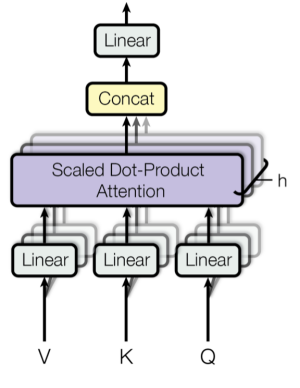

In [42]:
# A possible implementation of multi head attention
import tensorflow as tf

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, model_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.model_size = model_size
        
        assert model_size % self.num_heads == 0  # Ensure the model size is divisible by number of heads
        
        self.depth = model_size // self.num_heads
        
        self.wq = tf.keras.layers.Dense(model_size)  # Weight matrices for queries
        self.wk = tf.keras.layers.Dense(model_size)  # Weight matrices for keys
        self.wv = tf.keras.layers.Dense(model_size)  # Weight matrices for values

        self.dense = tf.keras.layers.Dense(model_size)  # Final dense layer after concatenation

    def split_heads(self, x, batch_size):
        #Split the last dimension into (num_heads, depth).
        #Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q):
        batch_size = tf.shape(q)[0]
        
        q = self.wq(q)  # Linear projection
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)  # Split heads
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        # Scaled dot-product attention
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        # Apply the softmax is done on the last axis (seq_len_k) so that the scores add up to 1.
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        
        output = tf.matmul(attention_weights, v)  # (batch_size, num_heads, seq_len_q, depth)

        output = tf.transpose(output, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)
        concat_output = tf.reshape(output, (batch_size, -1, self.model_size))  # (batch_size, seq_len_q, model_size)
        
        output = self.dense(concat_output)  # Pass through the final dense layer
        
        return output


In [43]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs) # Multi head attention where Key, Value and Query are all the same
        attn_output = self.dropout1(attn_output) # We add a dropout to reduce overfitting
        out1 = self.layernorm1(inputs + attn_output) # We add a residual connection and layernorm the result 
        ffn_output = self.ffn(out1) # Feedforward network
        ffn_output = self.dropout2(ffn_output) # a second dropout
        return self.layernorm2(out1 + ffn_output) # a second residual connection


Transformers need both token embedding (the words) and position embedding (the token order) because the transformer architecture does not inherently process sequential data with an awareness of order or position

In [44]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        # The embedding layer turns positive integers intodense vectors,
        # (Words with similar meaning are close to each other)
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        # get the number of tokens 
        maxlen = ops.shape(x)[-1]
        # get all positions in order
        positions = ops.arange(start=0, stop=maxlen, step=1)
        # the the embedded positions
        positions = self.pos_emb(positions)
        # compute the token embeddings
        x = self.token_emb(x)
        # finally return the embedded tokens + the positions 
        return x + positions

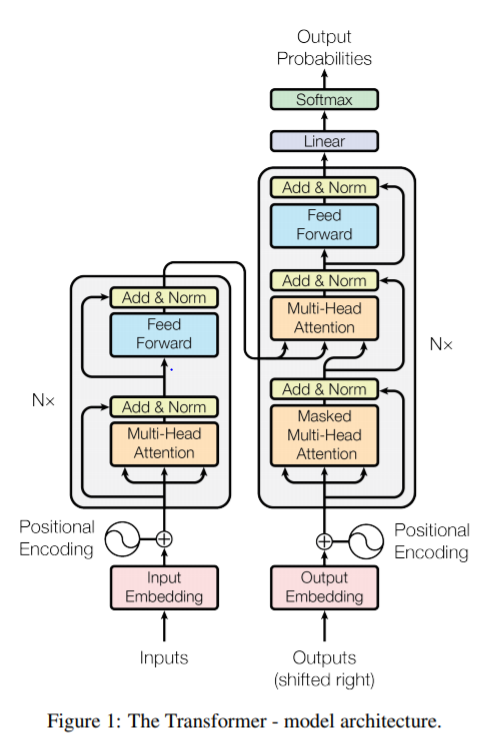

Beware! this is a simple transformer approach for classification, tasks such as text generation, translation and so on requires a much more complex model. 

In [45]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 500 # max number of input tokens
embed_dim = 32  # Embedding size for each token
num_heads = 16  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer

In [46]:

inputs = layers.Input(shape=(maxlen,)) # the input is a sequence of maxlen tokens (if not long enough is padded with zeros)
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim) # The embedding layer embed tokens and positions
x = embedding_layer(inputs) 
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim) 
x = transformer_block(x) # A transformer block process the data
# What follows is a simple classifier 
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [47]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 500)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ token_and_position_embedding    │ (None, 500, 32)           │    656,000 │
│ (TokenAndPositionEmbedding)     │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ transformer_block               │ (None, 500, 32)           │     71,424 │
│ (TransformerBlock)              │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_average_pooling1d        │ (None, 32)                │          0 │
│ (GlobalAveragePooling1D)        │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_5 (Dropout)             │ (None, 32)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 20)                │        660 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 20)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 2)                 │         42 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 728,126 (2.78 MB)

 Trainable params: 728,126 (2.78 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    train_ds, batch_size=32, epochs=10, validation_data=val_ds
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.5197 - loss: 0.6958 - val_accuracy: 0.5294 - val_loss: 0.6890
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.5869 - loss: 0.6608 - val_accuracy: 0.7910 - val_loss: 0.5293
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.7622 - loss: 0.5023 - val_accuracy: 0.7374 - val_loss: 0.5045
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8321 - loss: 0.3787 - val_accuracy: 0.8617 - val_loss: 0.3321
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8606 - loss: 0.3270 - val_accuracy: 0.8693 - val_loss: 0.3220
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8813 - loss: 0.2845 - val_accuracy: 0.8800 - val_loss: 0.3189
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9049 - loss: 0.2459 - val_accuracy: 0.8798 - val_loss: 0.3024
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9165 - loss: 0.2135 - 

In [49]:
model.evaluate(test_ds)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8752 - loss: 0.3550


[0.3500303626060486, 0.8753200173377991]